In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Merge all Files with API Data included

In [2]:
# use glob to get all the csv files in the folder
csv_files = glob.glob(os.path.join('./Data/Data_With_API/', "*.csv")) #path

main_df = pd.DataFrame()
starttimes = []
display(main_df)
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, comment="#")

    # datetime column
    df.insert(loc=0, column='Datetime', value = (df['Timestamp'])) 
    df['Datetime'] = pd.to_datetime(df['Datetime'], unit='s', utc = True).map(
        lambda x: x.tz_convert('America/Los_Angeles'))
    df['Datetime'] = df['Datetime'].dt.round('ms')
    #converts to datetime, rounds, timezones
    
    starttimes.append(df.iloc[(df['Ambient air temperature (°F)'].ne(0).idxmax()), 1]) 
    #keeps track of starttime for each CSV
    
    if main_df.empty:
        main_df = df
    else:
        main_df = pd.concat([main_df, df])

""


# Data Preprocessing

In [3]:
df = main_df
pd.set_option('display.max_columns', None) #shows all the columns

df.columns = df.columns.str.lstrip(' ') #removes a random space char in front of column names
df = df.loc[:, (df != 0).any(axis=0)] #removes all columns that have only zeros in them
df = df[df['Ambient air temperature (°F)'] != 0] #removes initial rows that don't contain any data
df.drop('Unnamed: 0', axis=1, inplace=True)
df.insert(loc=1, column='Timestamp', value = (df.pop('Timestamp'))) 
df.reset_index(drop = True, inplace=True)

df["Clouds"].fillna(method ="ffill", inplace= True) #fix nan cloud values
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61421 entries, 0 to 61420
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype                              
---  ------                                        --------------  -----                              
 0   Datetime                                      61421 non-null  datetime64[ns, America/Los_Angeles]
 1   Timestamp                                     61421 non-null  float64                            
 2   Time (sec)                                    61421 non-null  float64                            
 3   Instant fuel economy (MPG)                    61421 non-null  float64                            
 4   Total fuel economy (MPG)                      61421 non-null  float64                            
 5   Fuel rate (gal/hr)                            61421 non-null  float64                            
 6   Instant CO2 rate (lb/mile)                    61421 non-null  

**Export CSV as merged.csv**

<Axes: >

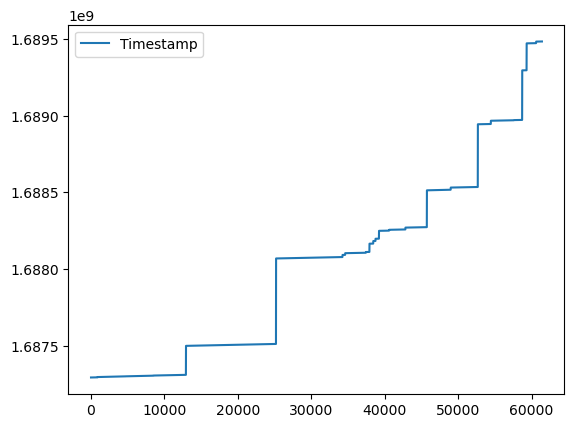

In [4]:
df.sort_values(by='Datetime', inplace = True)
df.reset_index(drop = True, inplace=True)
df.plot(y='Timestamp', use_index=True)

In [5]:
with open('./Data/Merged/api_merged.csv', 'w') as csv_file:
    df.to_csv(path_or_buf=csv_file, index=False)

# Exporting Resampled CSVs

In [6]:
df.set_index('Datetime', inplace = True)
df.head(1)

,Timestamp,Time (sec),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Engine RPM (RPM),Mass air flow rate (lb/min),Absolute load value (%),Mass air flow rate (lb/min).1,Engine Power (hp),Calculated load value (%),Time since engine start (sec),Ambient air temperature (°F),Intake manifold absolute pressure (inHg),Fuel system 1 status,Trip Distance (miles),Trip Fuel (gal),Trip Fuel Economy (MPG),Trip Duration (min),Ambient Temperature Sensor (°F),Blower Motor Speed Level,Compressor Speed (RPM),Compressor Target Speed (RPM),Room Temperature Sensor (°F),Engine Speed (RPM),Initial Intake Air Temperature (°F),Intake Air (°F),Hybrid battery pack remaining life (%),Boost (psi),Acceleration (ft/s²),Vehicle Speed (MPH),Adjusted Ambient Temperature (°F),Motor Actual Current (A),Motor Power Supply Voltage (V),Battery Voltage (V),Aircon Consumption Power (kW),Battery Block Max Voltage (V),Cooling Fan 0 (%),Status of the Aircon Gate Status / OFF or ON,Battery Voltage (V).1,Engine Torque (lb•ft),Set Temperature (Driver Side) (°F),Solar Sensor (Driver Side),Fuel Input (gal),Vehicle Load (%),Calculate Load (%),Outside Temp,Humidity,Wind Speed,Pressure,Feels_like,Clouds
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-06-20 13:48:12.798000-07:00,1.687294e+09,9.798,0.0,38.53833,0.0,0.0,0.0,0.0,1292.75,0.920808,30.19608,1.057125,0.0,60.39216,11,86.0,0.0,2,0.0,0.0,0.0,0.0,85.82,13,4146,3863,109.85,1292.0,93.875,91.4,65.88235,-7.541962,0.0,0.0,85.424,-0.03,27.048,14.472,1.3,15.45898,0.0,1,14.3,0.0,92.3,43,11.62357,29.80392,60.39216,81.857333,42.0,12.66,1010.0,81.567333,0.0


In [7]:
df_30sec = df.resample('30s').mean().round(3).reset_index()

df_1min = df.resample('1min').mean().round(3).reset_index()

df_5min = df.resample('5min').mean().round(3).reset_index()

df_10min = df.resample('10min').mean().round(3).reset_index()

In [8]:
df_30sec.dropna(axis=0, inplace=True) #skip over gap days
df_30sec.reset_index(inplace=True, drop=True)

df_1min.dropna(axis=0, inplace=True) #skip over gap days
df_1min.reset_index(inplace=True, drop=True)

df_5min.dropna(axis=0, inplace=True) #skip over gap days
df_5min.reset_index(inplace=True, drop=True)

df_10min.dropna(axis=0, inplace=True) #skip over gap days
df_10min.reset_index(inplace=True, drop=True)

In [9]:
with open('./Data/Merged/api_merged_30sec.csv', 'w') as csv_file:
    df_30sec.to_csv(path_or_buf=csv_file, index=False)

with open('./Data/Merged/api_merged_1min.csv', 'w') as csv_file:
    df_1min.to_csv(path_or_buf=csv_file, index=False)

with open('./Data/Merged/api_merged_5min.csv', 'w') as csv_file:
    df_5min.to_csv(path_or_buf=csv_file, index=False)

with open('./Data/Merged/api_merged_10min.csv', 'w') as csv_file:
    df_10min.to_csv(path_or_buf=csv_file, index=False)

# Data Analysis with Merged

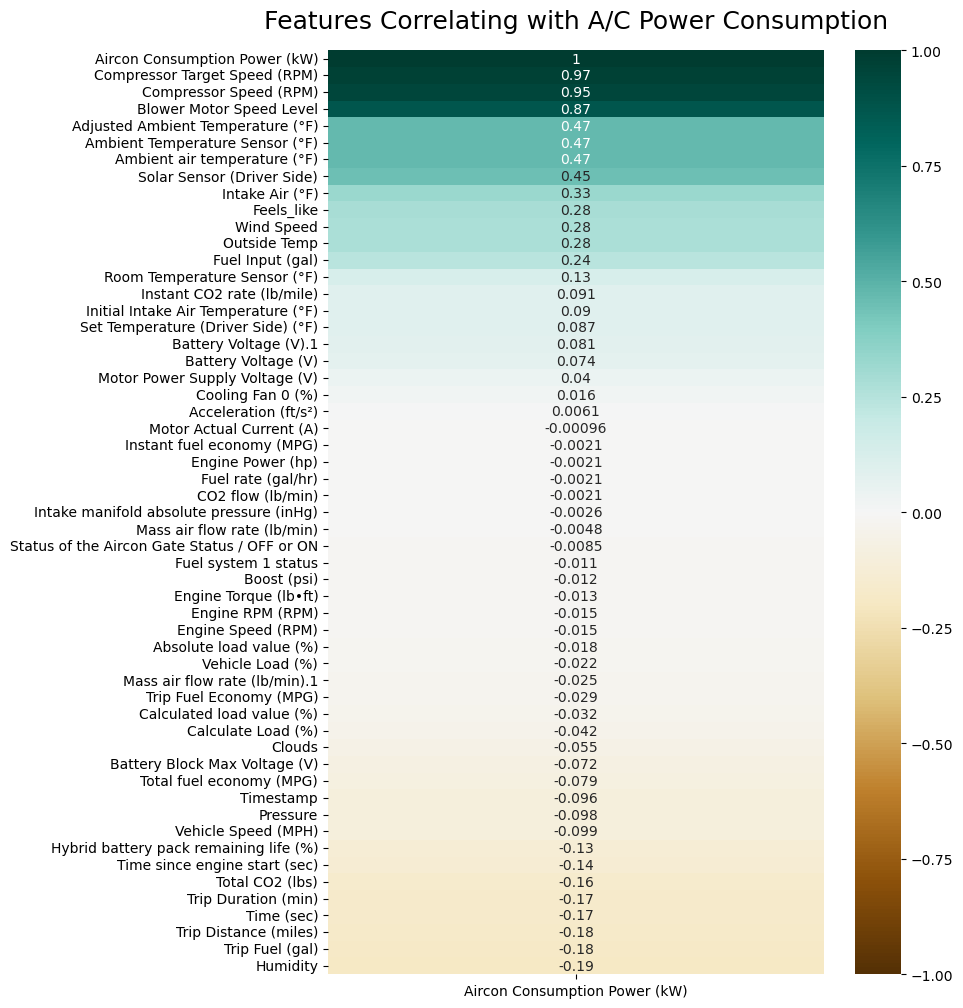

In [10]:
ac_corr = df.corr()[['Aircon Consumption Power (kW)']].sort_values(by='Aircon Consumption Power (kW)', ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ac_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with A/C Power Consumption', fontsize = 18, pad=16);
#plt.savefig("singleheatmat.png", bbox_inches='tight') 